In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sns.set()

# EDA анализ

In [5]:
# считаем данные в df
df = pd.read_csv("/kaggle/input/credit-data/train.csv").drop(columns="closed_at")
df.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,monthly_income,work_experience,requested_sum,main_agreement_amount,main_agreement_term,requested_period_days,requested_amount,req_app_amount,approved_amount,period_days,...,settlement,client_type.1,region,gender,loan_order,have_extension,contact_cases,created_at,start_dt,churn
0,-0.000735,0.952894,NaN,-0.388291,-0.340659,-0.389028,-1.053530,-0.629296,-0.617620,-0.340659,...,г Москва,repeated,г Москва,male,2,0,NaN,2022-12-23 17:50:25,NaN,0
1,-0.000742,0.952894,NaN,-0.388291,-1.145865,-1.294731,-0.436189,-0.020140,-0.617620,-1.145865,...,г Москва,repeated,г Москва,female,14,0,NaN,2024-06-29 22:26:08,NaN,0
2,-0.000742,0.952894,NaN,-0.388291,-0.685747,-1.113590,-0.259806,0.153905,-0.617620,-0.685747,...,г Пермь,repeated,край Пермский,male,10,0,NaN,2023-04-10 21:06:38,NaN,0
3,-0.000742,0.952894,NaN,-0.388291,0.176974,-1.385301,1.239449,1.633284,-0.617620,0.176974,...,г Самара,repeated,обл Самарская,female,2,1,NaN,2023-10-01 00:13:16,2024-01-12 17:29:21,0
4,-0.000742,0.952894,NaN,-0.388291,-1.145865,-1.657011,0.357534,0.763061,-0.617620,-1.145865,...,г Москва,repeated,г Москва,female,17,0,NaN,2024-07-15 10:40:35,NaN,0
5,-0.000742,0.952894,NaN,-0.089509,-0.398173,-1.385301,-0.347998,-0.107162,-0.350380,-0.398173,...,поселок Кизнер,repeated,Респ Удмуртская,male,3,0,NaN,2024-09-27 08:58:11,NaN,1
6,-0.000742,0.952894,NaN,3.944040,8.114011,NaN,1.680406,-1.325474,4.593562,8.114011,...,г Калининград,repeated,обл Калининградская,male,6,1,NaN,2024-03-10 04:57:55,2024-04-03 18:53:25,1
7,-0.000749,-1.653445,NaN,-0.687072,-0.340659,-0.389028,1.239449,1.807328,-0.884860,-0.340659,...,г Тихвин,repeated,обл Ленинградская,female,3,0,NaN,2022-12-21 15:43:15,NaN,0
8,-0.000749,-1.653445,NaN,-0.687072,0.176974,0.426103,1.239449,1.807328,-0.884860,0.176974,...,г Челябинск,repeated,обл Челябинская,male,6,0,NaN,2023-07-07 13:29:06,NaN,0
9,-0.000749,-1.653445,NaN,-0.687072,0.176974,0.426103,-1.053530,-0.455251,-0.884860,0.176974,...,г Одинцово рп Новоивановское,new,обл Московская,female,1,0,NaN,2023-10-22 15:22:25,NaN,0


In [6]:
df.shape

(4036207, 44)

In [23]:
# выведем признаки в df
df.columns

Index(['monthly_income', 'work_experience', 'requested_sum',
       'main_agreement_amount', 'main_agreement_term', 'requested_period_days',
       'requested_amount', 'req_app_amount', 'approved_amount', 'period_days',
       'days_finish_loan', 'ag', 'cnt_ext', 'term', 'price', 'elecs_sum',
       'recurents_sum', 'tamount', 'issues', 'principal', 'interest',
       'overdue_interest', 'overdue_fee', 'nbki_score', 'payment_frequency',
       'status', 'loan_id', 'client_id', 'source', 'first_source', 'interface',
       'type', 'repayment_type', 'client_type', 'settlement', 'client_type.1',
       'region', 'gender', 'loan_order', 'have_extension', 'contact_cases',
       'created_at', 'start_dt', 'churn'],
      dtype='object')

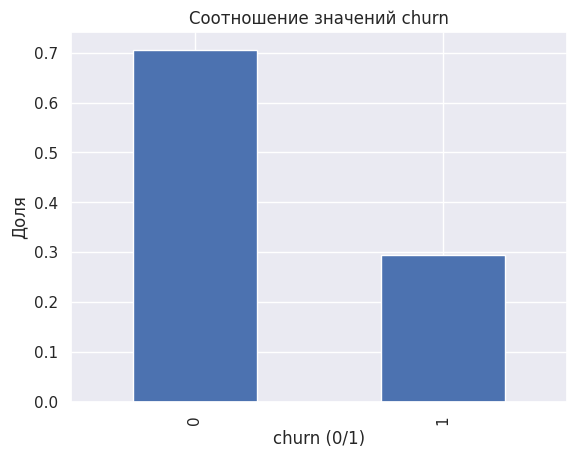

In [24]:
df['churn'].value_counts(normalize=True).plot(kind="bar")
plt.title("Соотношение значений сhurn")
plt.xlabel("сhurn (0/1)")
plt.ylabel("Доля")
plt.show()

In [25]:
# Выведем признаки у которых есть пропущенные значения
df_null = pd.DataFrame( df.isnull().sum()).\
                    set_axis(["portion"], axis=1).\
                    sort_values(by="portion", ascending=False).\
                    rename_axis("feature", axis=1)
df_null["portion"] /= len(df)
df_null[df_null.portion > 0] 

feature,portion
contact_cases,0.944027
price,0.887669
cnt_ext,0.887605
term,0.887605
start_dt,0.887450
requested_sum,0.878644
work_experience,0.656151
requested_period_days,0.109414
requested_amount,0.102779
req_app_amount,0.102779


In [26]:
# Рассмотрим признаки с типом object
df.select_dtypes("object").head()

,settlement,client_type.1,region,gender,created_at,start_dt
0,г Москва,repeated,г Москва,male,2022-12-23 17:50:25,NaN
1,г Москва,repeated,г Москва,female,2024-06-29 22:26:08,NaN
2,г Пермь,repeated,край Пермский,male,2023-04-10 21:06:38,NaN
3,г Самара,repeated,обл Самарская,female,2023-10-01 00:13:16,2024-01-12 17:29:21
4,г Москва,repeated,г Москва,female,2024-07-15 10:40:35,NaN


In [27]:
# Выведем кол-во градаций признаков region и settlement
print( "region:", df["region"].nunique() )
print( "settlement:", df["settlement"].nunique() )

region: 189
settlement: 47425


In [28]:
def fix_features(df):
    
    # contact_cases пропущенные признаки заполним нулем, т.к. подходит по смыслу:
    df["contact_cases"] = df["contact_cases"].fillna(0)
    
    # вместо признака start_dt добавим признак days_before_extension - кол-во дней до пролонгации 
    if "start_dt" in df.columns: 
        df['start_dt'] = pd.to_datetime(df['start_dt'], errors='coerce')  
        df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
        df['days_before_extension'] = (df['start_dt'] - df['created_at']).dt.days
        df['days_before_extension'] = df['days_before_extension'].fillna(0)
        df.drop(columns=["start_dt"], inplace=True)
        
    # разобьем признак created_at на следующие признаки
    if "created_at" in df.columns:
        df["day_at"] = df['created_at'].dt.day
        df["month_at"] = df['created_at'].dt.month
        df["week_day_at"] = df['created_at'].dt.weekday + 1
        df["hour"] = df['created_at'].dt.hour
        df.drop(columns=["created_at"], inplace=True)
    
    # признаки price, cnt_ext, term удалим, т.к. они имеют большую долю пропущенных значений ( > 0.85)
    if "price" in df.columns or "cnt_ext" in df.columns or "term" in df.columns:
        df.drop(columns=[ "price", "cnt_ext", "term" ], inplace=True)
    
    # объединим признаки requested_sum и requested_amount
    if "requested_sum" in df.columns:
        df["requested_amount"] = df["requested_amount"].fillna(df["requested_sum"])  
        df.drop(columns=["requested_sum"], inplace=True)

    # переопределим req_app_amount
    df["req_app_amount"] = df["approved_amount"] - df["requested_amount"]

    # удалим признаки region и settlement
    if "region" in df.columns or "settlement" in df.columns:
        df.drop(columns=["settlement", "region"], inplace=True)

    # закодируем признаки client_type.1 и gender
    if "gender" in df.columns or "client_type.1" in df.columns:
        df["is_new"] = df["client_type.1"].apply( lambda x: 1 if x == "new" else 0 )
        df["is_male"] = df["gender"].apply( lambda x: 1 if x == "male" else 0 )
        df.drop(columns=["client_type.1", "gender"], inplace=True)

    
    return df

In [29]:
def adjust_features(df): # заполним пропущенные значения у признаков 
    
    # заполним пропущенные значения requested_period_days значениями из признака main_agreement_term 
    df["requested_period_days"] = df["requested_period_days"].fillna( df["main_agreement_term"])
    
    # заполним пропущенные значения work_experience мединным значением в зависимости от значения status объекта
    df["work_experience"] = df[["status", "work_experience"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения req_app_amount мединным значением в зависимости от значения status объекта
    df["req_app_amount"] = df[["status", "req_app_amount"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения requested_amount мединным значением в зависимости от значения status объекта
    df["requested_amount"] = df[["status", "requested_amount"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения nbki_score мединным значением в зависимости от значения status объекта
    df["nbki_score"] = df[["status", "nbki_score"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения recurents_sum мединным значением в зависимости от значения status объекта
    df["recurents_sum"] = df[["status", "recurents_sum"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))

    # заполним пропущенные значения elecs_sum мединным значением в зависимости от значения status объекта
    df["elecs_sum"] = df[["status", "elecs_sum"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения tamount мединным значением в зависимости от значения status объекта
    df["tamount"] = df[["status", "tamount"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))
    
    # заполним пропущенные значения monthly_income мединным значением в зависимости от значения status объекта
    df["monthly_income"] = df[["status", "monthly_income"]].groupby(by="status").transform( lambda x: x.fillna(x.median()))

    
    return df

In [30]:
def engineer_features(df):   # Создадим новые признаки

    # финансовая нагрузка в зависомомти от одобренной суммы
    df["financial_burden_1"] = df["approved_amount"] / df["monthly_income"]
    
    # финансовая нагрузка в зависомомти от запрошенной суммы
    df["financial_burden_2"] = df["requested_amount"] / df["monthly_income"]
    
    # финансовая нагрузка в зависомомти от штрафов
    df["financial_burden_3"] = ( df["elecs_sum"] + df["recurents_sum"] ) / df["monthly_income"]
    
    # доля одобрения
    df["partition_approved"] = df["approved_amount"] / df["requested_amount"]
    
    #скорость погашения
    df["repayment_rate"] = df["principal"] / df["days_finish_loan"]
    
    # сумма всех штрафов
    df["total_penalty"] = df["elecs_sum"] + df["recurents_sum"]
    
    # переплата клиента
    df["overpayment"] = ( df["total_penalty"] + df["interest"] + df["overdue_interest"] ) / df["approved_amount"]
    
    # соотношение nbki и дохода
    df["score_to_income "] = df["nbki_score"] / df["monthly_income"]

    # номер недели в месяце когда был взят займ
    df["num_of_week_in_month"] = df["day_at"] // 7 + 1
    
    # Добавим признаки в зависимости от клиента
    arr = [ "client_id", "loan_id", "requested_amount", "approved_amount", \
           "req_app_amount", "week_day_at", "total_penalty", "have_extension", "month_at", "contact_cases", "repayment_type", "num_of_week_in_month"]
    
    
    # агрегируем некоторые признаки в зависимоти от клиента
    client_df = df[arr].groupby(by="client_id").agg(
        {
            "loan_id" : "count", # кол0во займов у клиента 
            "requested_amount" : "mean", # средняя запрошенная сумма у клиента
            "approved_amount" : "mean", # средняя одобренная сумма у клиента
            "req_app_amount" : "mean", # средняя разница между одобренной и запрошенная суммами у клиента
            "week_day_at" : lambda x: x.mode()[0], # самый частый день, в который клиент берет займ
            "total_penalty" : "mean", # средняя сумма всех штрафов у клиента
            "have_extension" : "sum", # кол-во просрочек у клиента
            "month_at" : lambda x: x.mode()[0], # самый частый месяц, в который клиент берет займ
            "contact_cases" : "mean", # среднее значение кол-во обращений клиента в с коллекшн
            "repayment_type" : lambda x: x.mode()[0], # самый частый тип комиссии у клиента
            "num_of_week_in_month" : lambda x: x.mode()[0]
            
        }
    )
    
    # переименуем подученные признаки
    client_df = client_df.reset_index().set_axis( [ "client_id", "all_loans", "avg_requested_amount", "avg_approved_amount", "avg_req_app_amount", \
                                                   "the_most_week_day_at", "avg_total_penalty", "all_extension", "the_most_month_at", \
                                                   "avg_contact_cases", "the_most_repayment_type", "the_most_num_of_week_in_month"], axis=1 )

    # заджойним два полученных df
    if "avg_loans" not in df.columns:
        df = df.merge(client_df, how="left", on="client_id")

    
    return df

In [31]:
def drop_outliers(df): # удалим выбросы с помощью изолирующего леса

    sample_data = df.drop(columns=["churn", "loan_id", "client_id"])

    model = IsolationForest(
        n_estimators=100,
        max_samples=256,   
        contamination='auto', 
        random_state=42,
        n_jobs=-1 
    )
    
    model.fit(sample_data)  
    
    outliers = model.predict(df.drop(columns=["churn", "loan_id", "client_id"]))
    
    cleaned_data = df[outliers == 1]
    
    print("Удалено выбросов:", len(df) - len(cleaned_data))

    
    return cleaned_data 

In [32]:
# скорректируем признаки
df = fix_features(df)
df = adjust_features(df)
df.shape

(4036207, 41)

In [33]:
# выведем колличество пропущенных значений df
df.isna().sum().sum()

0

In [35]:
# добавим новые признаки
df = engineer_features(df)

# удалим выбросы
df = drop_outliers(df)
df.shape

Удалено выбросов: 165667


(3870540, 61)

In [36]:
# выведем признаки
df.columns

Index(['monthly_income', 'work_experience', 'main_agreement_amount',
       'main_agreement_term', 'requested_period_days', 'requested_amount',
       'req_app_amount', 'approved_amount', 'period_days', 'days_finish_loan',
       'ag', 'elecs_sum', 'recurents_sum', 'tamount', 'issues', 'principal',
       'interest', 'overdue_interest', 'overdue_fee', 'nbki_score',
       'payment_frequency', 'status', 'loan_id', 'client_id', 'source',
       'first_source', 'interface', 'type', 'repayment_type', 'client_type',
       'loan_order', 'have_extension', 'contact_cases', 'churn',
       'days_before_extension', 'day_at', 'month_at', 'week_day_at', 'hour',
       'is_new', 'is_male', 'financial_burden_1', 'financial_burden_2',
       'financial_burden_3', 'partition_approved', 'repayment_rate',
       'total_penalty', 'overpayment', 'score_to_income ',
       'num_of_week_in_month', 'all_loans', 'avg_requested_amount',
       'avg_approved_amount', 'avg_req_app_amount', 'the_most_week_day_at

# Обучение моделей

In [37]:
# разделим выборку на обучающую и тестовую
X = df.drop(columns=["churn", "loan_id", "client_id"])
y = df["churn"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42, stratify=y, shuffle=True)

In [39]:
# созданим модель RandomForest
rfc = RandomForestClassifier(
    n_estimators=200,      
    max_depth=20,            
    max_features='sqrt',   
    criterion='gini',      
    class_weight='balanced',  
    random_state=42,      
    n_jobs=-1             
)

# обучим модель
rfc.fit( X_train, y_train)

# прогоним тестовыесданные данные
y_pred = rfc.predict(X_test)

print( "Метрики для Random Rorrest: \n", classification_report(y_test, y_pred) )

Метрики для Random Rorrest: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94    906735
           1       0.94      0.76      0.84    370544

    accuracy                           0.92   1277279
   macro avg       0.92      0.87      0.89   1277279
weighted avg       0.92      0.92      0.91   1277279



In [40]:
#создадим cbc
cbc = CatBoostClassifier(
    iterations=5000,          
    learning_rate=0.03,       
    depth=3,
    random_state=42,
    early_stopping_rounds=50  
)
# обучим моель
cbc.fit( X_train, y_train, verbose=500 )

0:	learn: 0.6658932	total: 436ms	remaining: 21m 46s
500:	learn: 0.2024965	total: 2m 42s	remaining: 13m 28s
1000:	learn: 0.1887119	total: 5m 19s	remaining: 10m 37s
1500:	learn: 0.1816813	total: 7m 56s	remaining: 7m 55s
2000:	learn: 0.1786403	total: 10m 31s	remaining: 5m 15s
2500:	learn: 0.1758924	total: 13m 8s	remaining: 2m 37s
2999:	learn: 0.1730962	total: 15m 48s	remaining: 0us


In [41]:
# прогоним тестовыесданные данные
y_pred = cbc.predict(X_test)

print( "Метрики для Cat Boosting: \n", classification_report(y_test, y_pred) )

Метрики для Cat Boosting: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    906735
           1       0.99      0.82      0.90    370544

    accuracy                           0.95   1277279
   macro avg       0.96      0.91      0.93   1277279
weighted avg       0.95      0.95      0.94   1277279



In [42]:
#создадим gbc
gbc = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# обучим моель
gbc.fit(X_train, y_train)

# прогоним тестовыесданные данные
y_pred = gbc.predict(X_test)

print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    906735
           1       1.00      0.80      0.89    370544

    accuracy                           0.94   1277279
   macro avg       0.96      0.90      0.93   1277279
weighted avg       0.95      0.94      0.94   1277279



#### Лучше всего себя показала модель CatBoost